### Classifying Fashion - MNIST
Fashion images : 28x28 which is total of 784 pixels and 10 classes

In [9]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [10]:
# Define network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0],-1) # Dont need to flatten the input tensor in trainng loop 
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1) 
        
        return x

In [11]:
# Create the network, define the criterion and optimizer
model = Classifier()
criterion = nn. NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003) # Uses momentum (optim.SGD does not)

In [24]:
# Downloading the data
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                               ])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data_t', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!
Processing...
Done!


In [25]:
#Train the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        logps = model(images) # log probabilites
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: 243.3743031732738
Training loss: 237.82698898762465
Training loss: 229.91645649075508
Training loss: 225.22625957801938
Training loss: 221.93864941969514


tensor([3, 2, 4, 4, 5, 8, 2, 1, 9, 0, 2, 6, 6, 2, 8, 3, 4, 8, 1, 5, 9, 7, 9, 0,
        0, 9, 4, 8, 9, 1, 5, 3, 2, 0, 4, 8, 7, 4, 8, 2, 8, 6, 3, 4, 0, 2, 1, 5,
        7, 9, 3, 9, 9, 6, 2, 8, 1, 2, 4, 9, 2, 1, 2, 8])


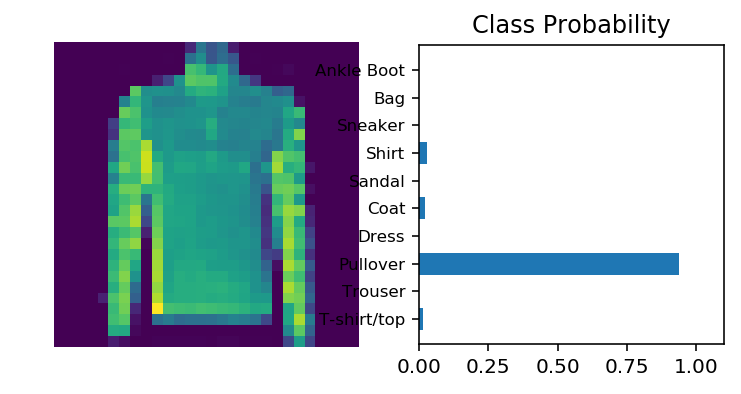

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import helper

# Test out your network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

print(labels)
ps = torch.exp(model(img))

helper.view_classify(img, ps, version='Fashion')